(11,)


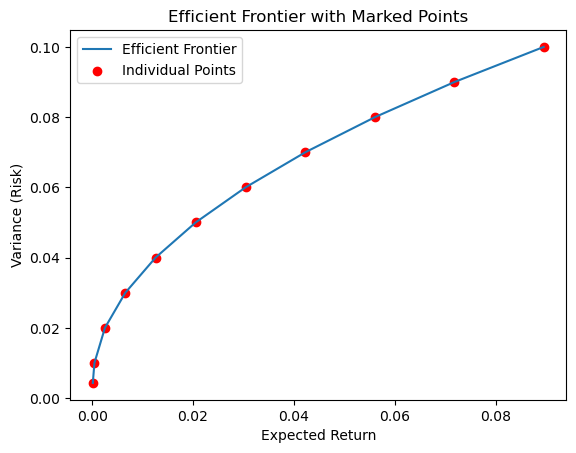

In [2]:
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

df = pd.read_csv('CT_RATES_FINAL - Sheet1.csv')
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
col_arr = {}
arr_list = []
mu=[]

for i in range(len(df.columns)):
    col_name = df.columns[i]
    col_arr[i+1] = df[col_name].to_numpy()
    mu.append(np.mean(col_arr[i+1])) 
    arr_list.append(col_arr[i+1])

data_matrix = np.array(arr_list)

# the covariance matrix
cov_mat = np.cov(data_matrix)


# Short selling is allowed
n = len(df.columns)
e = np.ones((n, 1))
mu = np.array(mu).reshape(-1, 1)

cov_mat_inv=np.linalg.inv(cov_mat)
a = float(np.dot(mu.T, np.dot(cov_mat_inv, e)))
b = float(np.dot(e.T, np.dot(cov_mat_inv, e)))
c = float(np.dot(mu.T, np.dot(cov_mat_inv, mu)))
d = float(np.dot(e.T, np.dot(cov_mat_inv, mu)))

u = -2 / (np.dot(np.dot(e.T,cov_mat_inv), e))
w = -0.5 * u * (np.dot(cov_mat_inv, e))
optimal_weights=[]
x=[]
y=[]
optimal_weights.append(w)
for i in range(1,11):
    s = float(i / 100)
    # Calculate the Lagrange multipliers v1 and v2
    v1 = -(s * b - d) / (a * d - b * c)
    v2 = -(c - s * a) / (a * d - b * c)

    # Calculate portfolio weights
    w = v1 * np.dot(cov_mat_inv, mu) + v2 * np.dot(cov_mat_inv, e)
    optimal_weights.append(w)
for i in range(0,11):
    y.append(np.dot(optimal_weights[i].T, mu))  # Expected return
    x.append(np.dot(np.dot(optimal_weights[i].T, cov_mat), optimal_weights[i]))  # Variance
    
y = np.squeeze(np.array(y))
x = np.squeeze(np.array(x))
print(x.shape)
# Sort x and y for Spline
x, y = zip(*sorted(zip(x, y)))
X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(min(x), max(x), 500)
Y_ = X_Y_Spline(X_)

# Plot the smooth curve
plt.plot(x, y, label='Efficient Frontier')

# Plot the points thatwe calculated
plt.scatter(x, y, color='red', marker='o', label='Individual Points')


plt.title("Efficient Frontier with Marked Points")
plt.xlabel("Expected Return")
plt.ylabel("Variance (Risk)")
plt.legend()
# show the curve
plt.show()